# MNIST DATASET

In [1]:
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.datasets import mnist

Cargamos el dataset

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### SGDClassifier

In [3]:
# Reshape the training and test data
x_train_reshaped = x_train.reshape(x_train.shape[0], -1)
x_test_reshaped = x_test.reshape(x_test.shape[0], -1)


# NORMALISE THE DATA

In [4]:
SGDclf1 = SGDClassifier(max_iter=1000, tol=1e-2) #‘l2’
SGDclf1.fit(x_train_reshaped, y_train)
SGDpredictions1 = SGDclf1.predict(x_test_reshaped)

In [5]:
SGDdifferences_i = [i for i,x in enumerate(SGDpredictions1) if x != y_test[i]]

Quiero ver la imagen que era realmente y la etiqueta que se le ha dado

Real , prediction: 5 ; 6


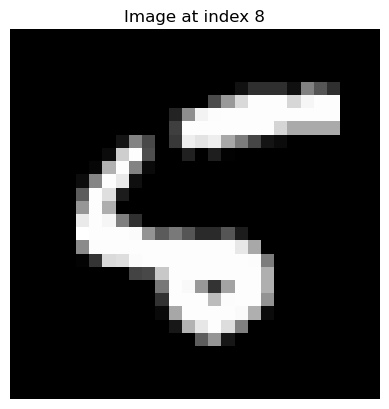

Real , prediction: 3 ; 5


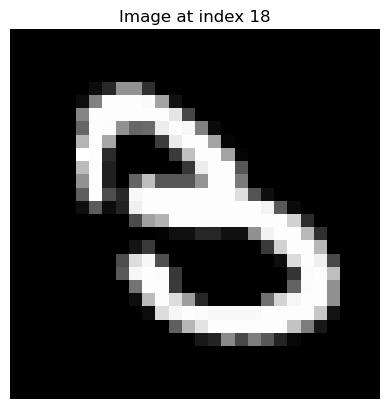

Real , prediction: 4 ; 0


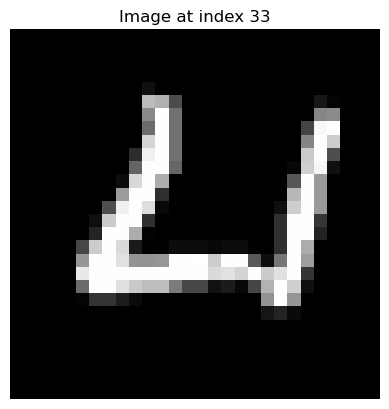

Real , prediction: 2 ; 3


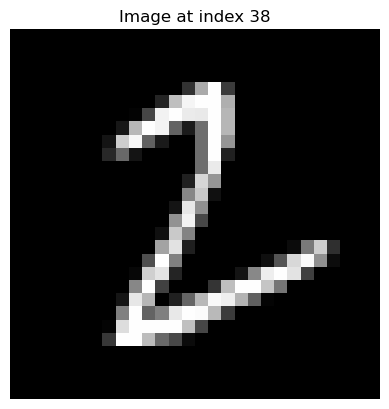

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

for i in range(4):
    index = SGDdifferences_i[i]
    print(f"Real , prediction: {y_test[index]} ; {SGDpredictions1[index]}")
    # Reshape the flattened image back to its 28x28 form for visualization
    image = x_test[index].reshape(28, 28)

    # Display the image
    plt.imshow(image, cmap='gray')
    plt.title(f"Image at index {index}")
    plt.axis('off')  # Hide axis
    plt.show()

In [7]:
SGDclf2 = SGDClassifier(max_iter=1000, tol=1e-2, penalty='l1') 
SGDclf2.fit(x_train_reshaped, y_train)
SGDpredictions2 = SGDclf2.predict(x_test_reshaped)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [8]:
SGDclf3 = SGDClassifier(max_iter=1000, tol=1e-2, penalty='elasticnet') 
SGDclf3.fit(x_train_reshaped, y_train)
SGDpredictions3 = SGDclf3.predict(x_test_reshaped)

In [9]:
for i,x in enumerate(['l2','l1','elasticnet']):
    print(f"{x} penalty")
    n = [SGDpredictions1,SGDpredictions2,SGDpredictions3]
    print(f"Accuracy: {accuracy_score(y_test, n[i])}")
    print(confusion_matrix(y_test, n[i]))
    print(f"")


l2 penalty
Accuracy: 0.8782
[[ 966    0    1    2    0    5    2    1    1    2]
 [   1 1116    5    0    0    3    4    0    2    4]
 [   8   10  929   14    4    9   22   12   18    6]
 [  17    1   30  826    1   78    7   12   11   27]
 [   2    1    8    1  781    2   12    9   12  154]
 [  22    3    1   19    8  761    9    4   35   30]
 [  17    4   10    3    6   36  872    1    5    4]
 [   3    5   32    5    0    2    1  900    2   78]
 [  19   22   22   29    8   63    8   11  678  114]
 [   7    4    3   10    7    5    0   15    5  953]]

l1 penalty
Accuracy: 0.8712
[[ 943    0    5    7    1    1    1    1   20    1]
 [   0 1100    4    2    0    1    5    1   20    2]
 [   5   14  856   32   11    2   16   12   83    1]
 [   9    1   27  813    2   51    4   19   72   12]
 [   1    2    8   11  881    0    1    7   49   22]
 [  15    4    4   33   15  711   13    6   81   10]
 [   4    3   12   22    2   15  872    1   27    0]
 [   1    4   13    7    8    1    1  919

### LogisticRegression

In [10]:
LRclf1 = LogisticRegression(max_iter=1000, tol=1e-2, solver='saga') #‘l2’
LRclf1.fit(x_train_reshaped, y_train)
LRpredictions1 = LRclf1.predict(x_test_reshaped)

In [11]:
LRdifferences_i = [i for i,x in enumerate(LRpredictions1) if x != y_test[i]]

Real , prediction: 5 ; 6


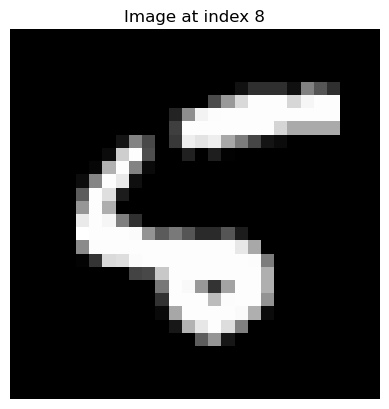

Real , prediction: 4 ; 6


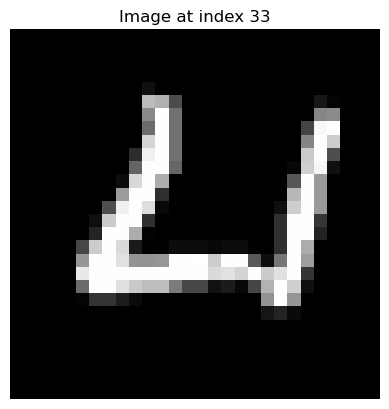

Real , prediction: 3 ; 2


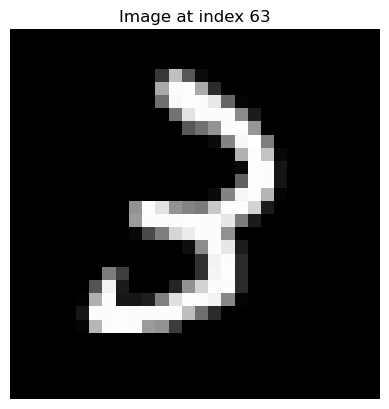

Real , prediction: 6 ; 2


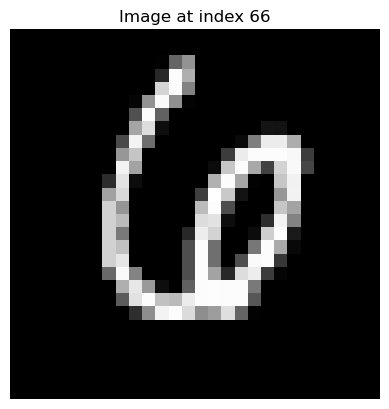

In [12]:
for i in range(4):
    index = LRdifferences_i[i]
    print(f"Real , prediction: {y_test[index]} ; {LRpredictions1[index]}")
    # Reshape the flattened image back to its 28x28 form for visualization
    image = x_test[index].reshape(28, 28)

    # Display the image
    plt.imshow(image, cmap='gray')
    plt.title(f"Image at index {index}")
    plt.axis('off')  # Hide axis
    plt.show()

In [13]:
LRclf2 = LogisticRegression(max_iter=1000, tol=1e-2, penalty='l1', solver='saga') 
LRclf2.fit(x_train_reshaped, y_train)
LRpredictions2 = LRclf2.predict(x_test_reshaped)

In [14]:
LRclf3 = LogisticRegression(max_iter=1000,l1_ratio=0.5, tol=1e-2, penalty='elasticnet', solver='saga') 
LRclf3.fit(x_train_reshaped, y_train)
LRpredictions3 = LRclf3.predict(x_test_reshaped)

In [15]:
for i,x in enumerate(['l2','l1','elasticnet']):
    print(f"{x} penalty")
    n = [LRpredictions3,LRpredictions3,LRpredictions3]
    print(f"Accuracy: {accuracy_score(y_test, n[i])}")
    print(confusion_matrix(y_test, n[i]))
    print(f"")

l2 penalty
Accuracy: 0.9256
[[ 962    0    0    3    1    2    5    4    3    0]
 [   0 1117    5    2    0    1    3    1    6    0]
 [   5   11  925   15    9    3   12   12   38    2]
 [   4    1   18  923    1   24    3    9   21    6]
 [   1    1    6    3  916    0    8    7    9   31]
 [  11    3    2   38   11  770   12    6   34    5]
 [   8    3    8    2    7   17  911    2    0    0]
 [   1    5   25    6    6    1    0  949    4   31]
 [   8   13    5   23    6   25   10   11  861   12]
 [  10    7    1    9   25    6    0   21    8  922]]

l1 penalty
Accuracy: 0.9256
[[ 962    0    0    3    1    2    5    4    3    0]
 [   0 1117    5    2    0    1    3    1    6    0]
 [   5   11  925   15    9    3   12   12   38    2]
 [   4    1   18  923    1   24    3    9   21    6]
 [   1    1    6    3  916    0    8    7    9   31]
 [  11    3    2   38   11  770   12    6   34    5]
 [   8    3    8    2    7   17  911    2    0    0]
 [   1    5   25    6    6    1    0  949

prueba 